<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section8)<br>
6. [**Model Development and Analysis**](#Section10)<br>
7. [**Summarization**](#Section9)</br>
---

---
<a name = Section1></a>
# **1. Introduction**
---

Carewell Insurance is into Providing General Insurance Services. Over the years the organization has transformed from the traditional manual way of doing the business to a more technologically advanced method of doing the business.


- They are a leading Insurance Company with 1 million policyholders. They provide insurance in Life Insurance, Motor insurance, Health insurance, Travel insurance, Property insurance, Mobile insurance.
- They want to build a model to predict whether the current policyholders (customers) from the past year will also be interested in additional Vehicle Insurance provided by the company.
- They want to automate the prediction process based on their policyholder’s collected data.


**Current Scenario**

- Determining whether a policyholder who already has a policy from the company will be interested in additional Vehicle Insurance policies is a manual task.
- It solely depends upon the policyholder’s confirmation and that consumes a lot of time and resources.
- Designing a prediction model to predict whether a policyholder will be interested or not can be helpful. However, this turns out to be a bit trickier.
- Currently, the Company is keeping track of the process by contacting each policyholder and getting their feedback.



---
<a name = Section2></a>
# **2. Problem Statement**
---

**The current process suffers from the following problems:**


- The current process is a manual confirmation of whether the policyholder will be interested in a Vehicle Insurance Policy.
- This is very tedious and time-consuming as it needs to be repeated for every policyholder.


The company has hired you as a data science consultant. They want to automate the process of predicting whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.

**Your Role**


- You are given a dataset consisting of demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel), etc.
- Your task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.



---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [129]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01|Id| Unique ID for the customer | 
|02|Gender| Gender of the customer | 
|03|Age| Age of the customer | 
|04|Driving_License| 0: Customer does not have DL, 1: Customer already has DL Region_Code: Unique code for the region of the customer |
|05|Previously_Insured| 1: Customer already has Vehicle Insurance, 0: Customer doesn't have Vehicle Insurance |
|06|Vehicle_Age| Age of the Vehicle |
|07|Vehicle_Damage| 1 corresponds to Customer got his/her vehicle damaged in the past. 0: Customer didn't get his/her vehicle damaged in the past |
|08|Annual_Premium| The amount customer needs to pay as a premium in the year |
|09|PolicySalesChannel|  Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc |
|10|Vintage| Number of Days, Customer has been associated with the company |
|11|Response| 1: Customer is interested, 0: Customer is not interested |


<a name = Section8></a>
# **6. Exploratory Data Analysis**

In [130]:
#Loading CSV file for train data

train_data = pd.read_csv('C:/Users/zoher/Desktop/Term 4/Project/Cross sell prediction/Cross Sell Prediction/train_data.csv')
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [132]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,150000.500000,38.815840,0.997863,26.382180,0.457947,30534.312123,112.118003,154.323843,0.122937
std,86602.684716,15.495699,0.046175,13.232431,0.498229,17247.475889,54.141651,83.643687,0.328365
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,75000.750000,25.000000,1.000000,15.000000,0.000000,24388.000000,29.000000,82.000000,0.000000
50%,150000.500000,36.000000,1.000000,28.000000,0.000000,31642.000000,133.000000,154.000000,0.000000
75%,225000.250000,49.000000,1.000000,35.000000,1.000000,39360.250000,152.000000,227.000000,0.000000
max,300000.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [133]:
#Loading CSV file for test data

test_data = pd.read_csv('C:/Users/zoher/Desktop/Term 4/Project/Cross sell prediction/Cross Sell Prediction/test_data.csv')
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,300001,Male,67,1,8.0,1,1-2 Year,No,34821.0,26.0,35
1,300002,Male,33,1,18.0,1,< 1 Year,No,2630.0,152.0,88
2,300003,Male,27,1,28.0,1,< 1 Year,No,41244.0,152.0,226
3,300004,Male,75,1,8.0,0,1-2 Year,Yes,41078.0,7.0,202
4,300005,Male,41,1,31.0,0,1-2 Year,Yes,2630.0,124.0,17


### **Data Information**

In [134]:
train_data.info()                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  object 
 7   Vehicle_Damage        300000 non-null  object 
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.5+ MB


In [135]:
# Checking for missing values in the training data set
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [136]:
# Checking for missing value in testing data set
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [137]:
# checking for unique rows in each column
train_data.nunique()

id                      300000
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           46133
Policy_Sales_Channel       153
Vintage                    290
Response                     2
dtype: int64

<Figure size 1080x720 with 0 Axes>

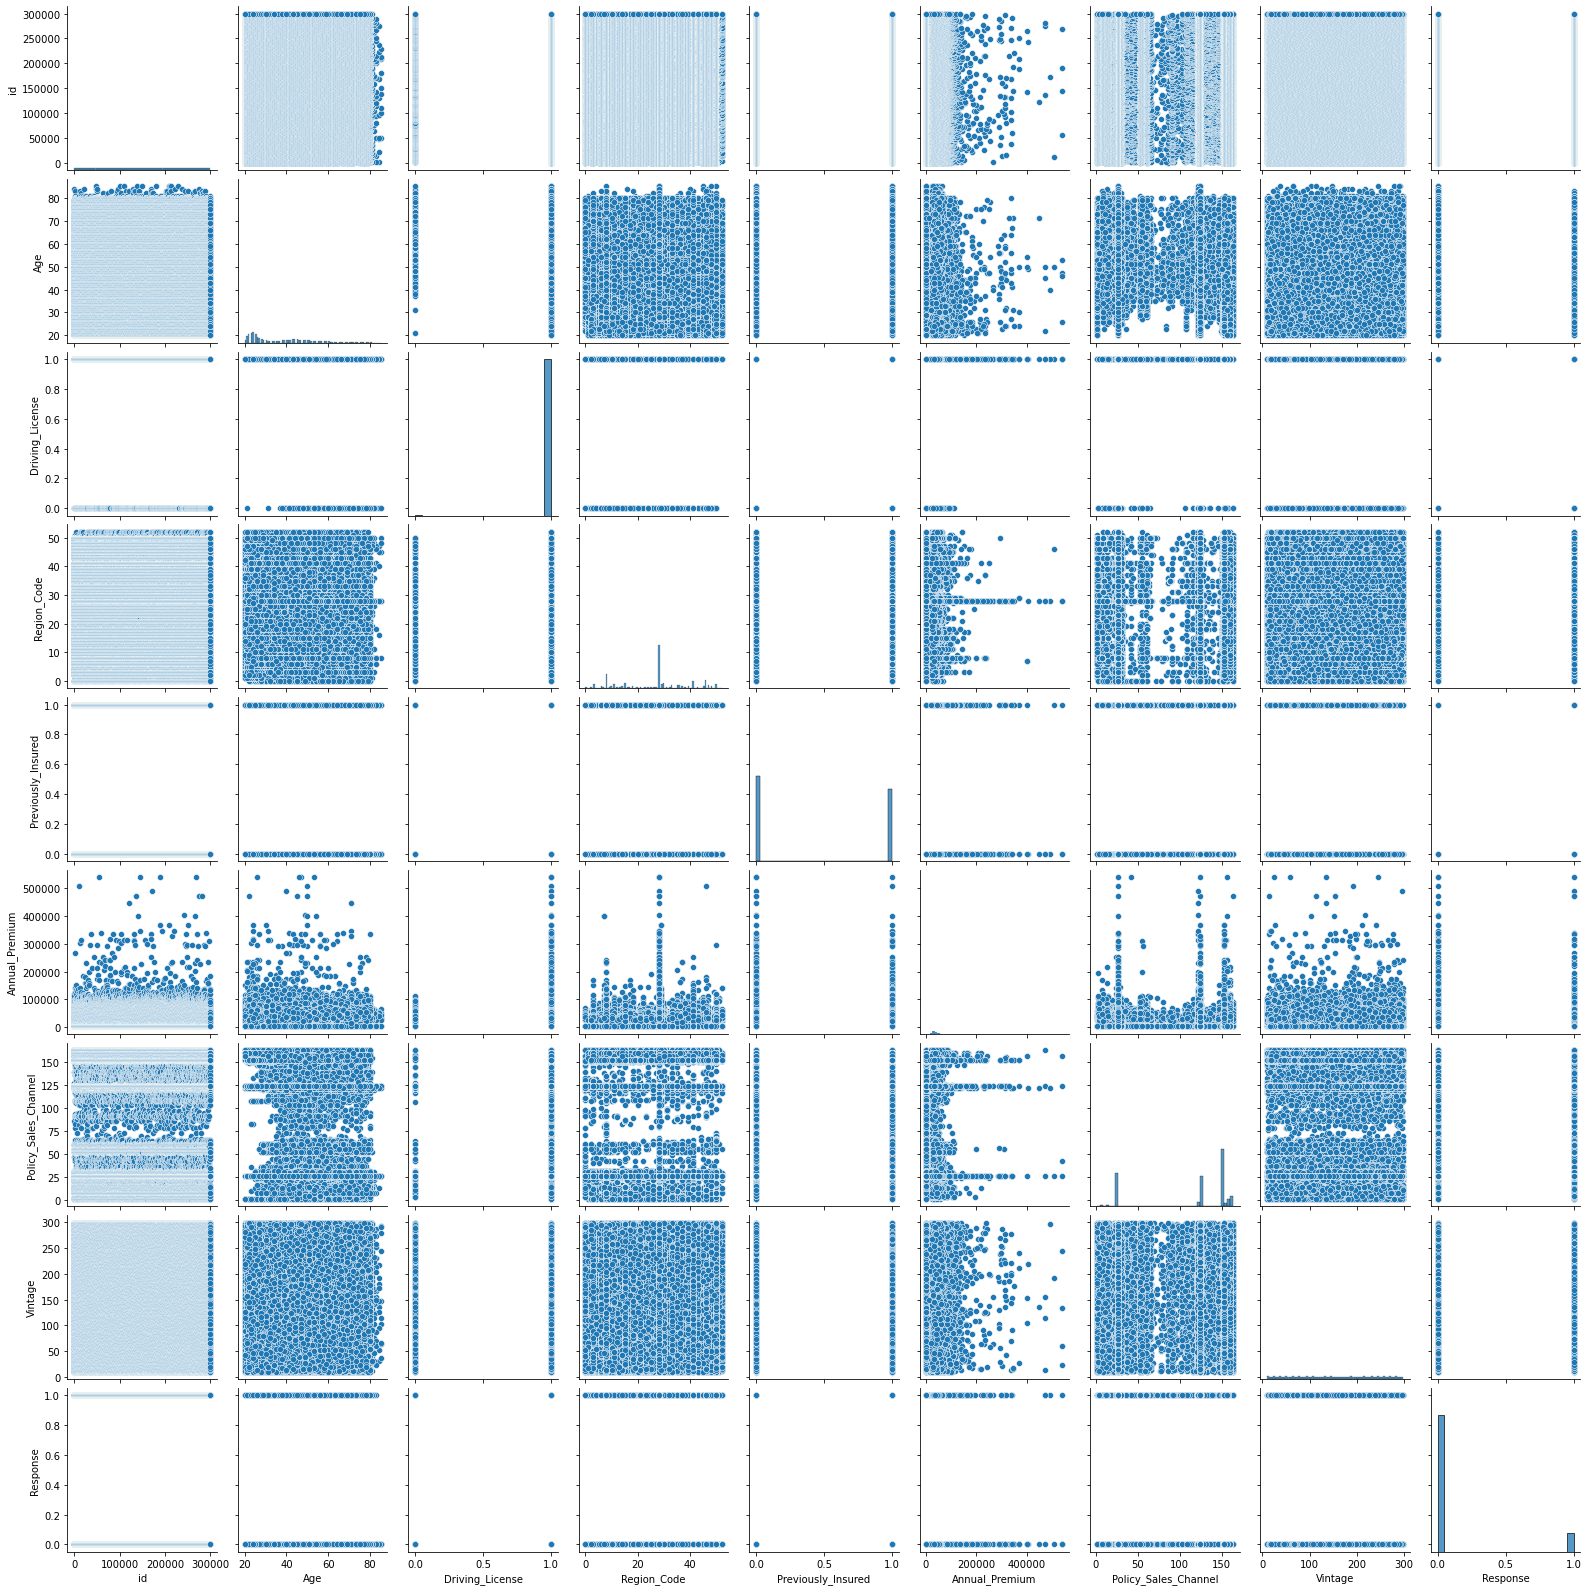

In [138]:
#Understanding the entire train data using a pair plot
plt.figure(figsize=(15,10))
sns.pairplot(train_data)    

Corelation beteween different attribute of data

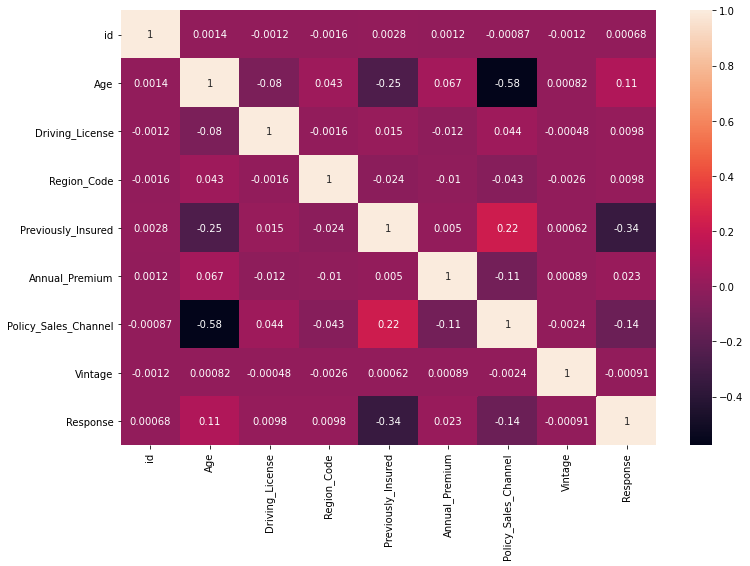

In [139]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

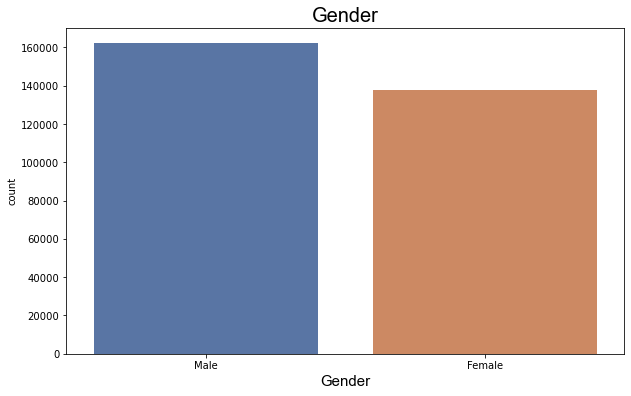

In [140]:
# distribution of Gender in the training data set
plt.figure(figsize = (10,6))
plt.title("Gender", size = 20, fontfamily = 'Arial')
plt.xlabel("Gender", size = 15, fontfamily = 'Arial')
sns.countplot(x = 'Gender', data = train_data, palette = "deep")
plt.show()

In [141]:
train_data["Gender"].value_counts()

Male      162174
Female    137826
Name: Gender, dtype: int64

In [142]:
# Distribution of age in the training data set
train_data['Age'].value_counts()

24    20435
23    18991
22    16479
25    16081
21    12963
      ...  
81       47
82       20
83       19
84       10
85       10
Name: Age, Length: 66, dtype: int64

<AxesSubplot:title={'center':'Age against Response'}, xlabel='Age', ylabel='count'>

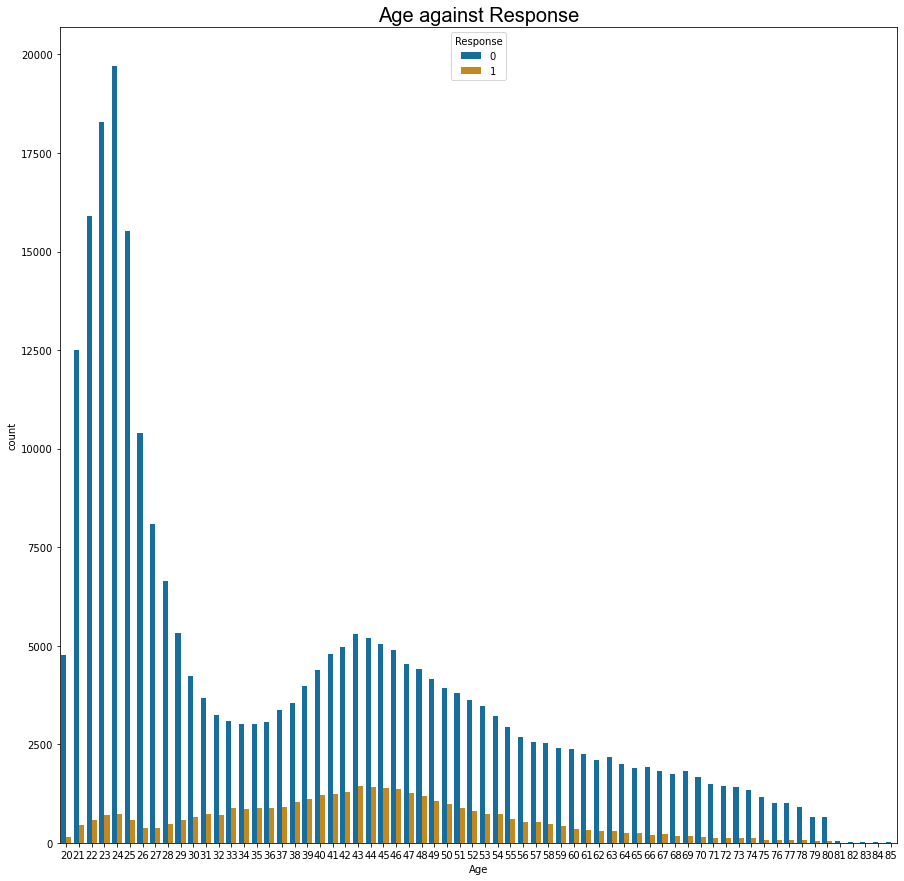

In [143]:
plt.figure(figsize = (15,15))
plt.title("Age against Response", size = 20, fontfamily = 'Arial')
sns.countplot(x = 'Age', data = train_data, palette = 'colorblind', hue = 'Response')


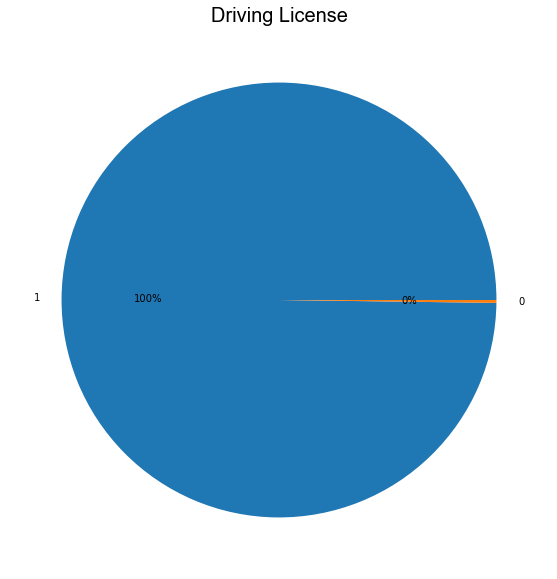

In [144]:
# distribution of Driving licecnse in the training data set
bar, ax = plt.subplots(figsize = (10,10))
ax = plt.pie(x = train_data['Driving_License'].value_counts(),autopct='%.0f%%',
             labels = train_data['Driving_License'].value_counts().index)
plt.title("Driving License", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.show()

In [145]:
train_data["Driving_License"].value_counts()

1    299359
0       641
Name: Driving_License, dtype: int64

<AxesSubplot:title={'center':'Driving License against Response'}, xlabel='Driving_License', ylabel='count'>

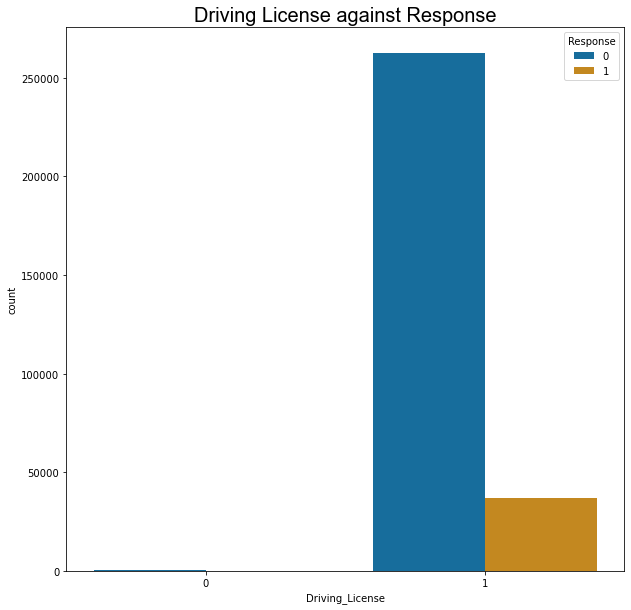

In [146]:
plt.figure(figsize = (10,10))
plt.title("Driving License against Response", size = 20, fontfamily = 'Arial')
sns.countplot(x = 'Driving_License', data = train_data, palette = 'colorblind', hue = 'Response')

In [147]:
# Distribution of Region in the training data set
train_data['Region_Code'].value_counts().values

array([83779, 26583, 15516, 14347, 10440,  9514,  8615,  8091,  7306,
        7303,  6886,  6016,  5847,  5516,  4986,  4411,  4397,  4078,
        3689,  3671,  3619,  3439,  3294,  3169,  3148,  2608,  2530,
        2432,  2248,  2213,  2094,  2082,  2061,  1989,  1913,  1610,
        1605,  1602,  1543,  1542,  1536,  1459,  1423,  1299,  1216,
        1043,  1043,  1021,   787,   626,   481,   196,   138],
      dtype=int64)

<AxesSubplot:title={'center':'Previously Insured against Response'}, xlabel='Previously_Insured', ylabel='count'>

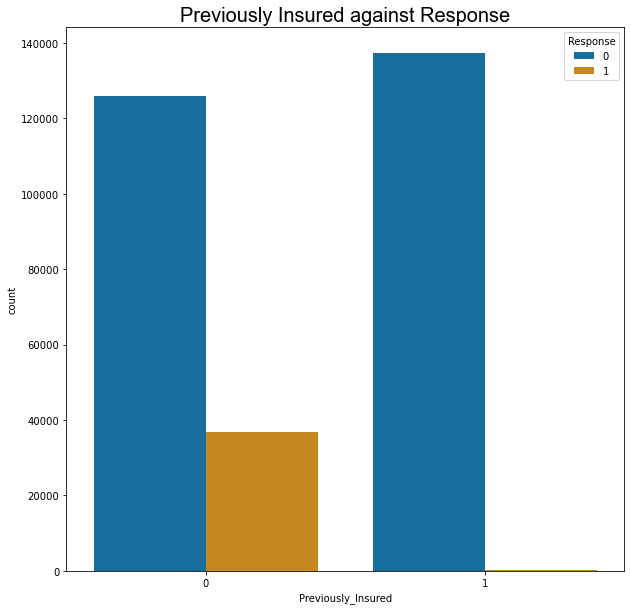

In [148]:
plt.figure(figsize = (10,10))
plt.title("Previously Insured against Response", size = 20, fontfamily = 'Arial')
sns.countplot(x = 'Previously_Insured', data = train_data, palette = 'colorblind', hue = 'Response')

In [149]:
train_data['Previously_Insured'].value_counts()

0    162616
1    137384
Name: Previously_Insured, dtype: int64

<AxesSubplot:title={'center':'Vehicle Age against Response'}, xlabel='Vehicle_Age', ylabel='count'>

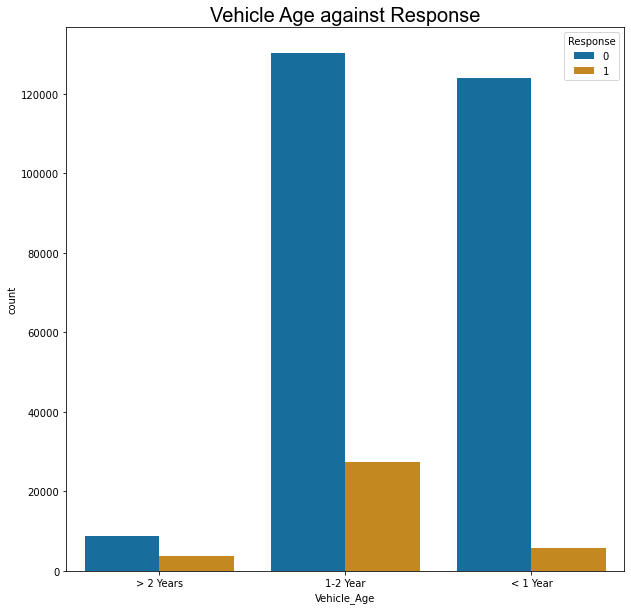

In [150]:
#Distribution of Vehicle age in the training data set
plt.figure(figsize = (10,10))
plt.title("Vehicle Age against Response", size = 20, fontfamily = 'Arial')
sns.countplot(x = 'Vehicle_Age', data = train_data, palette = 'colorblind', hue = 'Response')

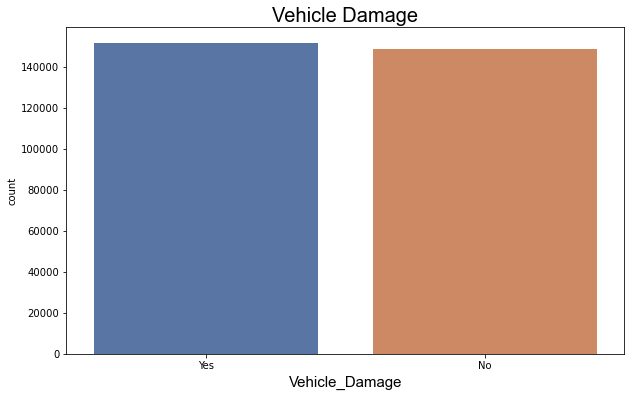

In [151]:
# distribution of Vehicle Damage in the training data set
plt.figure(figsize = (10,6))
plt.title("Vehicle Damage", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
sns.countplot(x = 'Vehicle_Damage', data = train_data, palette = "deep")
plt.show()

In [152]:
train_data["Vehicle_Damage"].value_counts()

Yes    151454
No     148546
Name: Vehicle_Damage, dtype: int64

In [153]:
# Describing Anual premium in the training data set
train_data['Annual_Premium'].describe()

count    300000.000000
mean      30534.312123
std       17247.475889
min        2630.000000
25%       24388.000000
50%       31642.000000
75%       39360.250000
max      540165.000000
Name: Annual_Premium, dtype: float64

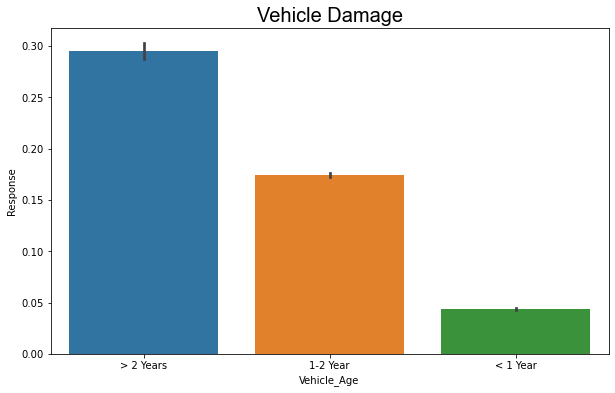

In [154]:
plt.figure(figsize = (10,6))
plt.title("Vehicle Damage", size = 20, fontfamily = 'Arial')
sns.barplot(x='Vehicle_Age',y='Response',data=train_data)
plt.show()

In [155]:
# Distribution of Policy Sales Channel in the training data set
train_data['Policy_Sales_Channel'].value_counts().values

array([106033,  62519,  58466,  17099,   8495,   7818,   5274,   4711,
         3087,   2267,   1466,   1456,   1233,   1182,   1127,    985,
          960,    959,    845,    842,    811,    699,    676,    619,
          612,    592,    487,    484,    481,    477,    416,    411,
          406,    394,    377,    327,    258,    253,    207,    172,
          145,    141,    139,    137,    131,    128,    127,    124,
          115,    113,    113,    108,    107,     96,     95,     93,
           89,     84,     83,     81,     80,     79,     77,     74,
           67,     59,     58,     55,     54,     54,     51,     48,
           48,     46,     44,     43,     43,     42,     40,     39,
           34,     32,     29,     26,     22,     21,     20,     20,
           20,     19,     19,     18,     18,     16,     15,     15,
           15,     14,     14,     14,     13,     13,     12,     11,
           11,     10,     10,      9,      9,      9,      9,      9,
      

In [156]:
# Describing Vintage in the training data set
train_data['Vintage'].describe()

count    300000.000000
mean        154.323843
std          83.643687
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [157]:
train_data["Response"].value_counts()

0    263119
1     36881
Name: Response, dtype: int64

# Encoding Categorical variable

In [159]:
def categorical_data(df):
    df.drop("id" , axis = 1 , inplace = True)
    df["Vehicle_Age"].replace({"> 2 Years":3,"1-2 Year":2,"< 1 Year":1},inplace = True)
    df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
    df["Vehicle_Damage"] = df["Vehicle_Damage"].map({"Yes":1,"No":0})
    return df

# <a name = Section10></a>
# **6. Model Development and Analysis**

In [160]:
train_df = categorical_data(train_data)

In [161]:
test_df = categorical_data(test_data)

In [162]:
train_data.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [163]:
#encoded_data = pd.get_dummies(train_data) 
#encoded_data.head()

In [164]:
#Splitting the train data set into training and testing.

X = train_data.drop(columns = "Response", axis = 1)
y = train_data["Response"]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1Response, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (270000, 10) (270000,)
Testing Data Shape: (30000, 10) (30000,)


In [166]:
X.shape

(300000, 10)

# Applying Logistic Regression

In [167]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [168]:
#predicting on train data
y_pred_train = logreg.predict(X_train)

#predicting on test data
y_pred_test = logreg.predict(X_test)

In [169]:
pred = logreg.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred))
pred = logreg.predict(X_train)
print('Accuracy score for train data is:', accuracy_score(y_train,pred))

Accuracy score for test data is: 0.8770666666666667
Accuracy score for train data is: 0.8770629629629629


In [170]:
X.shape

(300000, 10)

In [180]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died               26312                   0
Actual Survived            3688                   0


**Observations** 
- True Positive(TP) = 26312
- True Negative(TN) = 0
- False Positive(FP) = 3688
- False Negative(FN) = 0

# Applying Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier(random_state=42)
DecTree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [172]:
#predicting on train data
y_pred_train1 = DecTree.predict(X_train)

#predicting on test data
y_pred_test1 = DecTree.predict(X_test)

In [173]:
pred1 = DecTree.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred1))
pred1 = DecTree.predict(X_train)
print('Accuracy score for train data is:', accuracy_score(y_train,pred1))

Accuracy score for test data is: 0.8246666666666667
Accuracy score for train data is: 0.9999111111111111


# Applying Random Forest Classifier


In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
RandomForest = RandomForestClassifier(n_jobs=-1, random_state=42)


In [176]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [177]:
#predicting on train data
y_pred_train2 = RandomForest.predict(X_train)

#predicting on test data
y_pred_test2 = RandomForest.predict(X_test)

In [178]:
pred2 = RandomForest.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred2))
pred2 = RandomForest.predict(X_train)
print('Accuracy score for train data is:', accuracy_score(y_train,pred2))

Accuracy score for test data is: 0.8670333333333333
Accuracy score for train data is: 0.9998925925925926


In [179]:
prediction = RandomForest.predict(test_data)

In [ ]:
#print(prediction)

In [181]:
res = pd.DataFrame(prediction)
res.index = test_data.index
res.columns = ["Response"]
res.to_csv("Cross_Sell_prediction_results_zoherbehrainwala@gmail.com.csv", index = False, header = False)

---
<a name = Section9></a>
# **7. Summarization**
---

 - We studied in breifly about the data, its characteristics and its distribution.

 - We investigated about Response of the user whether they are interested in additional Vehicle Insurance provided by the company.

 - We **performed model training**.

 - We **observed metrics for our prediction**.
 
  - The prediction is done based on Accuracy score value as required.

 - We used Logistic Regression, Decision Tree and Random forest algorith and found the best fit model is Random forest with the best accuracy score.

 - This **model** now can **help us** in **identifying** the Response of the user who are interested in additional Vehicle insurance.
 
 - More Male user are likely to show interest in additional vehicle insurance.